In [1]:
# install.packages(c("httr", "jsonlite"))

In [1]:
library(httr)
library(jsonlite)
library(stringr)
library(dplyr)
library(rjson)

Warning message:
"package 'httr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'rjson'

The following objects are masked from 'package:jsonlite':

    fromJSON, toJSON



In [3]:
null_empty <- function(null_thing){
    if (is.null(null_thing) || is.na(null_thing)){
        return (' ')
    }
    return (null_thing)
}


#formateja els noms i cognoms que usa scopus perquè coincideixin amb el format de bibliometrix
format_name <- function(name){
    name = tolower(name)
    name = gsub('[.]','',name)
    name = gsub('[áàäâª]','a',name)
    name = gsub('[éèëê]','e',name)
    name = gsub('[íìïî]','i',name)
    name = gsub('[óòöôº]','o',name)
    name = gsub('[úùüû]','u',name)
    name = gsub('ñ','n',name)    
    return (name)
}


#crida l'api d'orcid i retorna l'informació d'un autor amb un determinat orcid
orcid_api <- function(id){
    res = GET(paste0('https://pub.orcid.org/v2.1/',id),add_headers( Accept='application/json'))
    cont = content(res, as='parse', type='application/json', encoding='UTF-8' )
#     surname= paste(strsplit(cont$person$name$'family-name',' ')[[1]],collapse='-')
    surname = cont$person$name$'family-name'$value
    firstname = cont$person$name$'given-names'$value
#     print(paste('surname', is.null(surname)))
#     name = try(paste(paste(strsplit(surname,' ')[[1]],collapse='-'), paste(lapply(strsplit(firstname,' '), function(word){return(substr(word,1,1))})[[1]], collapse='')))
#     if (class(name)=='try-error' ) name = paste(surname, firstname)
    try_employ = try(cont$'activities-summary'$employments$'employment-summary'[[1]])
    if (class(try_employ) != 'try-error'){
        dep = try_employ$'department-name'
        uni = try_employ$organization$name
    } else {
        try_education = try(cont$'activities-summary'$educations$'education-summary'[[1]])
        if (class(try_education) != 'try-error'){
            dep = try_education$'department-name'
            uni = try_education$organization$name
        } else {
            dep = ' '
            uni = ' '
        }
    }
    
    if (id=='0000-0003-1260-4445') {
        surname='Estruch'
        firstname = 'Ramón'}
    
    return (c(null_empty(firstname), null_empty(surname), null_empty(dep), null_empty(uni),null_empty(res$`status_code`)))
}

get_main <-function(variant){
    main = variants_main[[variant]]
    if (is.null(main) || is.na(main)) main = 'NULO'
    return (main)
    
}



build_main <- function(firstname, surname){
    
    firstname = strsplit(format_name(firstname),' ')[[1]]
    surname = format_name(paste(strsplit(surname,' ')[[1]],collapse='-'))[[1]]
    name1 = try(paste(surname, paste(lapply(firstname, function(word){return(substr(word,1,1))}), collapse='')))
    if (class(name1)=='try-error' ) name1 = paste(surname, firstname)
    return (name1)
}

get_variants <-function(firstname, surname){
    firstname = strsplit(format_name(firstname),' ')[[1]]
    surname = format_name(paste(strsplit(surname,' ')[[1]],collapse='-'))[[1]]

    i=1
    name = list()
    
    name1 = try(paste(surname, paste(lapply(firstname, function(word){return(substr(word,1,1))}), collapse='')))
    if (class(name)=='try-error' ) name1 = paste(surname, firstname)
    
    name2 = paste(surname, substr(firstname[[1]],1,2))
    
    if (length(firstname)==2){
        name3 = paste(firstname[[2]],surname, substr(firstname[[1]],1,1) )
        name4 = paste(surname,  substr(firstname[[1]],1,1) )
        return (c(name1, name2, name3, name4))
    } else{ 
        return (c(name1, name2))}
    
    return (name)
}


id1 = '0000-0002-3114-0984'
id2 = '0000-0002-0772-9721'

orcid_api(id1)
orcid_api(id2)

[1] "Albert"                                 
[2] "DIaz-Guilera"                           
[3] "Fisica de la Materia Condensada / UBICS"
[4] "Universitat de Barcelona"               
[5] "200"

[1] "Péter"                            "Kovács"                          
[3] "Department of Numerical Analysis" "Eötvös Loránd Tudományegyetem"   
[5] "200"

In [5]:
library(readr)

#load a list of autors identified with their orcid
file = read_file('autors.dat')
ids = strsplit(file,'\r\n')[[1]]
ids = unique(unlist(lapply(ids, function(string){return (substr(string,1,19))})))

DF <- data.frame(id =rep("", length(ids)), firstname=rep("", length(ids)), surname=rep("", length(ids)), Department=rep("", length(ids)), University=rep("", length(ids)), status=rep("", length(ids)), stringsAsFactors=FALSE)   


#get the author data for each author and put it in a row of a dataframe
for (i in 1:length(ids)){
    id = ids[i]
    DF[i, ] <- c(id, orcid_api(id) )
}



print('after')
DF = cbind(DF, Author=mapply(build_main,DF$firstname, DF$surname,  USE.NAMES=FALSE))
DF = DF %>% mutate(Name=paste(firstname, surname))


Error in cont$"activities-summary"$employments$"employment-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$educations$"education-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$employments$"employment-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$educations$"education-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$employments$"employment-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$educations$"education-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$employments$"employment-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$educations$"education-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$employments$"employment-summary"[[1]] : 
  subscript out of bounds
Error in cont$"activities-summary"$educations$"education-summary"[[1]] : 
  subscript out 

In [6]:
DF

id                  firstname     surname           
1   0000-0003-0047-0793 Raul          Ramos-Lobo        
2   0000-0002-3114-0984 Albert        DIaz-Guilera      
3   0000-0001-8720-4193 Maria Carmen  Llasat            
4   0000-0002-1179-7380 Javier        Martin-Vide       
5   0000-0002-1097-6395 Rosina        Girones           
6   0000-0003-1812-9323 Ricardo Pedro Casaroli-Marano   
7   0000-0002-1287-4560 Rosa M        Lamuela-Raventos  
8   0000-0002-4921-2640 Alfonso       Herranz-Loncán    
9   0000-0002-2644-6268 Montserrat    Guillen           
10  0000-0001-9407-7751 F. Xavier     Sans Serra        
11  0000-0001-7390-7840 Susana        Narotzky          
12  0000-0003-1706-8215 Núria         Casamitjana Badia 
13  0000-0002-7647-0063 Vicente       Royuela           
14  0000-0003-4494-4508 Marta         Soler Gallart     
15  0000-0001-7230-516X Ramon         Flecha            
16  0000-0002-2262-1663 Laura         Ruiz-Eugenio      
17  0000-0001-8963-615X Lídia         Puigvert Mallart  
18  0000-0003-4584-8956 Jaime         Magre Ferran      
19  0000-0002-7632-6758 Anicet        Blanch            
20  0000-0001-8892-0431 francisco     lucena            
21  0000-0002-4570-7152 JOAN          MATA-ALVAREZ      
22  0000-0003-4925-3386 Miquel        Salgot            
23  0000-0002-1406-1512 Josefina C.   Tapias            
24  0000-0001-5764-7217 Diana         Puigserver        
25  0000-0002-1550-1305 Narcís        Prat              
26  0000-0002-9578-6530 Amelia        Díaz Álvarez      
27  0000-0001-5829-3166 Lothar        Schulte           
28  0000-0001-6949-3681 Domènec       Corbella Llobet   
29  0000-0001-5267-7601 Miquel        Canals            
30  0000-0001-7454-8296 Jofre         Carnicer          
... ...                 ...           ...               
71  0000-0001-6523-6848 Sergi         Munné-Bosch       
72  0000-0002-7269-8626 M Carmen      Vidal-Carou       
73  0000-0001-8215-7180 Mariluz       Latorre-Moratalla 
74  0000-0002-9411-0395 Oriol         Comas-Basté       
75  0000-0001-5408-0593 Margarida     Castell           
76  0000-0002-8494-4978 Cristina      Andres-Lacueva    
77  0000-0002-0211-9166 Rosa          Casas             
78  0000-0002-8956-6566 Silvia        De Zordo          
79  0000-0002-2782-6748 Cristina      Larrea-Killinger  
80  0000-0002-2023-9110 Olga          Jubany            
81  0000-0002-2657-1640 Oriol         Beltran           
82  0000-0001-7887-841X Sílvia        Bofill Poch       
83  0000-0002-5489-8376 Conxita       Avila             
84  0000-0002-3712-0810 Josep M.      Ninot             
85  0000-0002-8866-2388 Jose Luis     Araus             
86  0000-0002-8111-9059 Albert        Bosch             
87  0000-0003-1402-4727 Miquel        Arnedo            
88  0000-0002-2134-7674 Marta         Riutort           
89  0000-0001-8110-9435 Isabel        Muñoz             
90  0000-0001-9136-136X Teresa        Vegas-Vilarrúbia  
91  0000-0002-1694-0924 salvador      nogues            
92  0000-0001-8581-7180 Silvia        Bofill-Mas        
93  0000-0003-3855-2743 Cristina      Linares           
94  0000-0002-7631-8715 Marisol       Felip Benach      
95  0000-0002-2983-3335 Núria         Bonada            
96  0000-0002-7712-6328 Andrea        Butturini         
97  0000-0002-2772-8486 Javier        Romero            
98  0000-0002-1309-3942 Joan          Vallès            
99  0000-0001-6767-231X Francesc      Sabater           
100 0000-0002-3120-1724 Domingo       Rodríguez Teijeiro
    Department                                                            
1   Econometrics, Statistics and Applied Economics                        
2   Fisica de la Materia Condensada / UBICS                               
3   Department of Applied Physics                                         
4                                                                         
5   Microbiology                                                          
6   Hospital Clinic 

In [7]:
DF$Name

[1] "Raul Ramos-Lobo"               "Albert DIaz-Guilera"          
  [3] "Maria Carmen Llasat"           "Javier Martin-Vide"           
  [5] "Rosina Girones"                "Ricardo Pedro Casaroli-Marano"
  [7] "Rosa M Lamuela-Raventos"       "Alfonso Herranz-Loncán"       
  [9] "Montserrat Guillen"            "F. Xavier Sans Serra"         
 [11] "Susana Narotzky"               "Núria Casamitjana Badia"      
 [13] "Vicente Royuela"               "Marta Soler Gallart"          
 [15] "Ramon Flecha"                  "Laura Ruiz-Eugenio"           
 [17] "Lídia Puigvert Mallart"        "Jaime Magre Ferran"           
 [19] "Anicet Blanch"                 "francisco lucena"             
 [21] "JOAN MATA-ALVAREZ"             "Miquel Salgot"                
 [23] "Josefina C. Tapias"            "Diana Puigserver"             
 [25] "Narcís Prat"                   "Amelia Díaz Álvarez"          
 [27] "Lothar Schulte"                "Domènec Corbella Llobet"      
 [29] "Miquel  Canals"                "Jofre Carnicer"               
 [31] "Glòria Furdada Bellavista"     "Antoni Riera-Mestre"          
 [33] "xavier corbella"               "Ramón Estruch"                
 [35] "Jose Menchon"                  "Francesc Formiga"             
 [37] "Concepció Patxot"              "Albert Solé-Ollé"             
 [39] "Javier Vázquez-Grenno"         "Elisabet Viladecans-Marsal"   
 [41] "Ana Moragues-Faus"             "Alejandro Esteller-Moré"      
 [43] "MONTSERRAT PAREJA-EASTAWAY"    "Judit Vall castello"          
 [45] "Jordi Bayona-i-Carrasco"       "Fernando Gil-Alonso"          
 [47] "Joseba Achotegui"              "Lídia Farré"                  
 [49] "Rosa Lázaro Castellanos"       "Alberto Martín Pérez"         
 [51] "Ariadna Munté Pascual"         "Jordi Muñoz"                  
 [53] "Núria Vergés Bosch"            "Josep Perelló"                
 [55] "Marian Boguna"                 "M. Ángeles Serrano"           
 [57] "Mar Campins Eritja"            "Jordi Vitrià"                 
 [59] "Oriol Pujol"                   "David Moriña"                 
 [61] "Begoña Campos"                 "Josep Carrasco"               
 [63] "Cristian Tebé"                 "M. Belén Gómez Martín"        
 [65] "Joan-Albert Lopez-Bustins"     "Santiago (Santi) Sabaté"      
 [67] "Mª Carmen Moreno García  "     "Mariano Barriendos"           
 [69] "Marc Oliva"                    "Isabel Cacho"                 
 [71] "Sergi Munné-Bosch"             "M Carmen Vidal-Carou"         
 [73] "Mariluz Latorre-Moratalla"     "Oriol Comas-Basté"            
 [75] "Margarida Castell"             "Cristina Andres-Lacueva"      
 [77] "Rosa Casas"                    "Silvia De Zordo"              
 [79] "Cristina Larrea-Killinger"     "Olga Jubany"                  
 [81] "Oriol Beltran"                 "Sílvia Bofill Poch"           
 [83] "Conxita Avila"                 "Josep M. Ninot"               
 [85] "Jose Luis Araus"               "Albert Bosch"                 
 [87] "Miquel Arnedo"                 "Marta Riutort"                
 [89] "Isabel Muñoz"                  "Teresa Vegas-Vilarrúbia"      
 [91] "salvador nogues"               "Silvia Bofill-Mas"            
 [93] "Cristina Linares"              "Marisol Felip Benach"         
 [95] "Núria Bonada"                  "Andrea Butturini"             
 [97] "Javier Romero"                 "Joan Vallès"                  
 [99] "Francesc Sabater"              "Domingo Rodríguez Teijeiro"

In [15]:

i2 = 0
variants_main = list()

dff2 = data.frame(main=rep("", length(ids)*4), variant=rep("", length(ids)*4), stringsAsFactors = FALSE)
dff = mapply(get_variants,DF$firstname, DF$surname,  USE.NAMES=FALSE)
for (i in 1:length(dff)){
    dffi = dff[[i]]
    len = length(dffi)
    main = dffi[1]
    
    for (j in 1:len){
        i2 = i2 + 1
        dff2[i2,] = c(main, dffi[j])
        variants_main[[dffi[[j]]]] = main}
        
}
variants = unique(dff2$variant)

dff2 = dff2[dff2$main !='',]




rm(dff, i2, len, main, dffi, start_time, end_time )

Warning message in rm(dff, i2, len, main, dffi, start_time, end_time):
"object 'start_time' not found"Warning message in rm(dff, i2, len, main, dffi, start_time, end_time):
"object 'end_time' not found"

In [35]:
variants

[1] "ramos-lobo r"            "ramos-lobo ra"          
  [3] "diaz-guilera a"          "diaz-guilera al"        
  [5] "llasat mc"               "llasat ma"              
  [7] "carmen llasat m"         "llasat m"               
  [9] "martin-vide j"           "martin-vide ja"         
 [11] "girones r"               "girones ro"             
 [13] "casaroli-marano rp"      "casaroli-marano ri"     
 [15] "pedro casaroli-marano r" "casaroli-marano r"      
 [17] "lamuela-raventos rm"     "lamuela-raventos ro"    
 [19] "m lamuela-raventos r"    "lamuela-raventos r"     
 [21] "herranz-loncan a"        "herranz-loncan al"      
 [23] "guillen m"               "guillen mo"             
 [25] "sans-serra fx"           "sans-serra f"           
 [27] "xavier sans-serra f"     "narotzky s"             
 [29] "narotzky su"             "casamitjana-badia n"    
 [31] "casamitjana-badia nu"    "royuela v"              
 [33] "royuela vi"              "soler-gallart m"        
 [35] "soler-gallart ma"        "flecha r"               
 [37] "flecha ra"               "ruiz-eugenio l"         
 [39] "ruiz-eugenio la"         "puigvert-mallart l"     
 [41] "puigvert-mallart li"     "magre-ferran j"         
 [43] "magre-ferran ja"         "blanch a"               
 [45] "blanch an"               "lucena f"               
 [47] "lucena fr"               "mata-alvarez j"         
 [49] "mata-alvarez jo"         "salgot m"               
 [51] "salgot mi"               "tapias jc"              
 [53] "tapias jo"               "c tapias j"             
 [55] "tapias j"                "puigserver d"           
 [57] "puigserver di"           "prat n"                 
 [59] "prat na"                 "diaz-alvarez a"         
 [61] "diaz-alvarez am"         "schulte l"              
 [63] "schulte lo"              "corbella-llobet d"      
 [65] "corbella-llobet do"      "canals m"               
 [67] "canals mi"               "carnicer j"             
 [69] "carnicer jo"             "furdada-bellavista g"   
 [71] "furdada-bellavista gl"   "riera-mestre a"         
 [73] "riera-mestre an"         "corbella x"             
 [75] "corbella xa"             "estruch r"              
 [77] "estruch ra"              "menchon j"              
 [79] "menchon jo"              "formiga f"              
 [81] "formiga fr"              "patxot c"               
 [83] "patxot co"               "sole-olle a"            
 [85] "sole-olle al"            "vazquez-grenno j"       
 [87] "vazquez-grenno ja"       "viladecans-marsal e"    
 [89] "viladecans-marsal el"    "moragues-faus a"        
 [91] "moragues-faus an"        "esteller-more a"        
 [93] "esteller-more al"        "pareja-eastaway m"      
 [95] "pareja-eastaway mo"      "vall-castello j"        
 [97] "vall-castello ju"        "bayona-i-carrasco j"    
 [99] "bayona-i-carrasco jo"    "gil-alonso f"           
[101] "gil-alonso fe"           "achotegui j"            
[103] "achotegui jo"            "farre l"                
[105] "farre li"                "lazaro-castellanos r"   
[107] "lazaro-castellanos ro"   "martin-perez a"         
[109] "martin-perez al"         "munte-pascual a"        
[111] "munte-pascual ar"        "munoz j"                
[113] "munoz jo"                "verges-bosch n"         
[115] "verges-bosch nu"         "perello j"              
[117] "perello jo"              "boguna m"               
[119] "boguna ma"               "serrano ma"             
[121] "serrano m"               "angeles serrano m"      
[123] "campins-eritja m"        "campins-eritja ma"      
[125] "vitria j"                "vitria jo"              
[127] "pujol o"                 "pujol or"               
[129] "morina d"                "morina da"              
[131] "campos b"                "campos be"              
[133] "carrasco j"              "carrasco jo"            
[135] "tebe c"                  "tebe cr"                
[137] "gomez-martin mb"         "gomez-martin m"         


In [10]:
library(bibliometrix)
file <- ('todo_ub.bib')
M <- convert2df(file, dbsource = "wos", format = "bibtex")



To cite bibliometrix in publications, please use:

Aria, M. & Cuccurullo, C. (2017) bibliometrix: An R-tool for comprehensive science mapping analysis, 
                                 Journal of Informetrics, 11(4), pp 959-975, Elsevier.
                        

https://www.bibliometrix.org

                        
For information and bug reports:
                        - Send an email to info@bibliometrix.org   
                        - Write a post on https://github.com/massimoaria/bibliometrix/issues
                        
Help us to keep Bibliometrix free to download and use by contributing with a small donation to support our research team (https://bibliometrix.org/donate.html)

                        
To start with the shiny web-interface, please digit:
biblioshiny()




Converting your wos collection into a bibliographic dataframe

Done!


Generating affiliation field tag AU_UN from C1:  Done!



In [17]:
dfau

Author             
1  andres-lacueva c   
2  barriendos m       
3  bofill-mas s       
4  boguna m           
5  bonada n           
6  bosch a            
7  casaroli-marano rp 
8  casas r            
9  castell m          
10 corbella x         
11 diaz-guilera a     
12 estruch r          
13 flecha r           
14 girones r          
15 guillen m          
16 herranz-loncan a   
17 lamuela-raventos rm
18 llasat mc          
19 lucena f           
20 martin-vide j      
21 munoz j            
22 perello j          
23 royuela v          
24 schulte l          
25 serrano ma         
26 sole-olle a        
27 soler-gallart m    
   DOI                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [25]:
auszz = authorProdOverTime(M,k=1000000, graph = FALSE)
dfau = auszz['dfPapersAU']$dfPapersAU
dfau = data.frame(Author=dfau$Author, DOI=dfau$DOI, stringsAsFactors=FALSE)

dfau = cbind(apply(dfau[1:1],2,tolower), dfau[2:2])

dfau = dplyr::filter(dfau, `Author` %in% variants)
dfau = dfau[!is.na(dfau$DOI),]
dfau = as.data.frame(cbind(Author=dff2$main[match(dfau$Author, dff2$variant)], DOI=dfau$DOI))
dfau
dfau = group_by(dfau, Author) %>% summarise(DOI = paste0(DOI, collapse = "---"))
dfau

aus_dois = levels(droplevels(dfau[[1]]))
nr_to_aus = setNames(aus_dois, 1:length(aus_dois))
aus_to_nr = setNames(1:length(aus_dois), aus_dois)
get_aus= function(nr){(nr_to_aus[[nr]])}
get_nr = function(aus){aus_to_nr[[aus]]}
dois = dfau[[2]]

# rm(dff2, auszz)

Author             
1    lamuela-raventos rm
2    lamuela-raventos rm
3    lamuela-raventos rm
4    lamuela-raventos rm
5    lamuela-raventos rm
6    lamuela-raventos rm
7    lamuela-raventos rm
8    lamuela-raventos rm
9    lamuela-raventos rm
10   lamuela-raventos rm
11   lamuela-raventos rm
12   lamuela-raventos rm
13   lamuela-raventos rm
14   lamuela-raventos rm
15   lamuela-raventos rm
16   lamuela-raventos rm
17   lamuela-raventos rm
18   lamuela-raventos rm
19   lamuela-raventos rm
20   lamuela-raventos rm
21   lamuela-raventos rm
22   lamuela-raventos rm
23   lamuela-raventos rm
24   lamuela-raventos rm
25   lamuela-raventos rm
26   lamuela-raventos rm
27   lamuela-raventos rm
28   lamuela-raventos rm
29   lamuela-raventos rm
30   lamuela-raventos rm
...  ...                
1202 llasat mc          
1203 llasat mc          
1204 llasat mc          
1205 llasat mc          
1206 llasat mc          
1207 llasat mc          
1208 llasat mc          
1209 llasat mc          
1210 llasat mc          
1211 llasat mc          
1212 llasat mc          
1213 llasat mc          
1214 llasat mc          
1215 llasat mc          
1216 llasat mc          
1217 llasat mc          
1218 llasat mc          
1219 llasat mc          
1220 llasat mc          
1221 llasat mc          
1222 llasat mc          
1223 llasat mc          
1224 llasat mc          
1225 llasat mc          
1226 perello j          
1227 schulte l          
1228 serrano ma         
1229 serrano ma         
1230 serrano ma         
1231 sole-olle a        
     DOI                                                             
1    10.3390/antiox10040540                                          
2    10.3390/antiox10030473                                          
3    10.3390/pharmaceutics12121221                                   
4    10.1111/1541-4337.12643                                         
5    10.3390/antiox9100910                                           
6    10.3390/antiox9101009                                           
7    10.1021/acsomega.9b04329                                        
8    10.3390/molecules25112582                                       
9    10.3390/pharmaceutics12020134                                   
10   10.1021/acs.jafc.9b04816                                        
11   10.1016/j.clnu.2018.07.014                                      
12   10.1080/01635581.2018.1531136                                   
13   10.3390/nu11040851                                              
14   10.1080/10408398.2017.1394815                                   
15   10.1021/acs.jnatprod.8b00366                                    
16   10.3390/nu10121892                                              
17   10.3390/nu10111766                                              
18   10.1016/j.bcp.2018.07.050                                       
19   10.3390/nu10101523                                              
20   10.1056/NEJMoa1800389                                           
21   10.1080/10408398.2016.1158690                                   
22   10.1002/mnfr.201600980                                          
23   10.1016/j.foodres.2017.01.020                                   
24   10.1002/mnfr.201601010                                          
25   10.1016/j.foodres.2017.01D09                                    
26   10.1039/c7fo00558j                                              
27   10.1111/bcp.12986                                               
28   10.1155/2017/3674390                                            
29   10.1001/jamaophthalmol.2016.2906                                
30   10.1002/mnfr.201600190                                          
...  ...                                                             
1202 10.1016/j.jhydrol.2005.02.004                                   
1203 10.5194/nhess-5-565-2005                                        
1204 10.5194/nhess-5-959-2005                                        
1205 

Author             
1  andres-lacueva c   
2  barriendos m       
3  bofill-mas s       
4  boguna m           
5  bonada n           
6  bosch a            
7  casaroli-marano rp 
8  casas r            
9  castell m          
10 corbella x         
11 diaz-guilera a     
12 estruch r          
13 flecha r           
14 girones r          
15 guillen m          
16 herranz-loncan a   
17 lamuela-raventos rm
18 llasat mc          
19 lucena f           
20 martin-vide j      
21 munoz j            
22 perello j          
23 royuela v          
24 schulte l          
25 serrano ma         
26 sole-olle a        
27 soler-gallart m    
   DOI                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [31]:
DF = DF[DF$Author %in% aus_dois ,]
idxs = unlist(lapply(levels(droplevels(factor(DF$Author, unique(DF$Author)))), get_nr))
DF

id                  firstname     surname         
2  0000-0002-3114-0984 Albert        DIaz-Guilera    
3  0000-0001-8720-4193 Maria Carmen  Llasat          
4  0000-0002-1179-7380 Javier        Martin-Vide     
5  0000-0002-1097-6395 Rosina        Girones         
6  0000-0003-1812-9323 Ricardo Pedro Casaroli-Marano 
7  0000-0002-1287-4560 Rosa M        Lamuela-Raventos
8  0000-0002-4921-2640 Alfonso       Herranz-Loncán  
9  0000-0002-2644-6268 Montserrat    Guillen         
13 0000-0002-7647-0063 Vicente       Royuela         
14 0000-0003-4494-4508 Marta         Soler Gallart   
15 0000-0001-7230-516X Ramon         Flecha          
20 0000-0001-8892-0431 francisco     lucena          
27 0000-0001-5829-3166 Lothar        Schulte         
33 0000-0001-9889-0272 xavier        corbella        
34 0000-0003-1260-4445 Ramón         Estruch         
38 0000-0003-2007-1300 Albert        Solé-Ollé       
52 0000-0002-2078-4047 Jordi         Muñoz           
54 0000-0001-8533-6539 Josep         Perelló         
55 0000-0001-7833-3487 Marian        Boguna          
56 0000-0001-8779-5931 M. Ángeles    Serrano         
68 0000-0001-9220-1245 Mariano       Barriendos      
75 0000-0001-5408-0593 Margarida     Castell         
76 0000-0002-8494-4978 Cristina      Andres-Lacueva  
77 0000-0002-0211-9166 Rosa          Casas           
86 0000-0002-8111-9059 Albert        Bosch           
92 0000-0001-8581-7180 Silvia        Bofill-Mas      
95 0000-0002-2983-3335 Núria         Bonada          
   Department                                                
2  Fisica de la Materia Condensada / UBICS                   
3  Department of Applied Physics                             
4                                                            
5  Microbiology                                              
6  Hospital Clinic de Barcelona - Spain                      
7                                                            
8  Economic History, Institutions, Politics and World Economy
9  Cass Business School                                      
13                                                           
14 Sociological Theory                                       
15 Sociology                                                 
20 Microbiology                                              
27 Department de Geografia Física i AGR                      
33 Executive Committee                                       
34 Medicine                                                  
38                                                           
52 Department of Political Science                           
54                                                           
55 Departament de Física Fonamental                          
56                                                           
68 Physical Geography                                        
75 Fisiologia                                                
76                                                           
77 Cardiovascular disease, Nutrition and aging               
86 Genética, Microbiologia y Estadística                     
92                                                           
95 Departament d'Ecologia                                    
   University                                                                        
2  Universitat de Barcelona                                                          
3  University of Barcelona                                                           
4  University of Barcelona                                                           
5  Universitat de Barcelona                                                          
6  Ricardo Pedro Casaroli-Marano                                                     
7  INSA_UB                                                                           
8  University of Barcelona                                                           
9  City, University of London                                      

In [26]:
library(networkD3)
library(visNetwork)
library(d3r)
library(igraph)
library(dplyr)

library(rjson)
NetMatrix <- biblioNetwork(M, analysis = "collaboration", network = "authors", sep = ";")


Warning message:
"package 'networkD3' was built under R version 3.6.3"Warning message:
"package 'visNetwork' was built under R version 3.6.3"Warning message:
"package 'd3r' was built under R version 3.6.3"Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [27]:




# NetMatrix <- biblioNetwork(M, analysis = "collaboration", network = "authors", sep = ";")
# net=networkPlot(NetMatrix, n = dim(NetMatrix)[1], Title = "Author Collaboration", type = "mds",
# size=TRUE, remove.multiple=TRUE,labelsize=0.4, degree=0, halo=TRUE)
net=networkPlot(NetMatrix,
                n = 1,
                Title = "Author Collaboration",
                type = "auto",
                label=FALSE,
                halo=FALSE,
                cluster="louvain",
                size=TRUE,
                remove.multiple=TRUE,
                degree=0,
                verbose=FALSE
                )
graf = net$graph
graf = delete_vertices(graf, !(V(graf)$name %in% variants))


# graf2 = induced_subgraph(graf, (V(graf)$name %in% aus[1:10]))

In [10]:
V(graf)

+ 34/34 vertices, named, from 0758f90:
 [1] lamuela-raventos rm     guillen m               estruch r              
 [4] girones r               llasat mc               diaz-guilera a         
 [7] andres-lacueva c        bofill-mas s            royuela v              
[10] casaroli-marano rp      lamuela-raventos r      carmen llasat m        
[13] casas r                 casaroli-marano r       barriendos m           
[16] herranz-loncan a        lucena f                bosch a                
[19] martin-vide j           soler-gallart m         flecha r               
[22] boguna m                munoz j                 pedro casaroli-marano r
[25] serrano ma              angeles serrano m       bonada n               
[28] castell m               corbella x              llasat m               
+ ... omitted several vertices

In [32]:
# vertex_attr(graf)
graf2 = graf
graf2 = delete_vertex_attr(graf2,'name')
graf2 = delete_vertex_attr(graf2,'deg')
graf2 = delete_vertex_attr(graf2,'size')
graf2 = delete_vertex_attr(graf2,'label.cex')
# graf2 = delete_vertex_attr(graf2,'color')
# graf2 = delete_vertex_attr(graf2,'community')
graf2 = delete_vertex_attr(graf2,'label.dist')
graf2 = delete_vertex_attr(graf2,'frame.color')
graf2 = delete_vertex_attr(graf2,'label.color')
graf2 = delete_vertex_attr(graf2,'label')
graf2 = delete_vertex_attr(graf2,'label.font')


vec = unlist(lapply(V(graf)$name, get_main))
vec = unlist(lapply(vec, get_nr))
# vec
graf2 = contract(graf2, vec, vertex.attr.comb=first)
V(graf2)$name = aus_dois
V(graf2)$deg =  degree(graf2)
graf2 = graf2 %>% set_vertex_attr(name="full-name", index=idxs, value=DF$Name)
graf2 = graf2 %>% set_vertex_attr(name="Department", index=idxs, value=DF$Department)
graf2 = graf2 %>% set_vertex_attr(name="University", index=idxs, value=DF$University)
graf2 = graf2 %>% set_vertex_attr(name="ORCID", index=idxs, value=DF$id)
V(graf2)$DOI = dois

V(graf2)$x = rep(0, length(vec))
V(graf2)$y = rep(0, length(vec))
V(graf2)$vx = rep(0, length(vec))
V(graf2)$vy = rep(0, length(vec))
# vertex_attr(graf2)



Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"

In [12]:
vertex_attr(graf2)

$color
 [1] "#FFD92F80" "#A6D85480" "#E31A1C80" "#80B1D380" "#FB807280" "#E31A1C80"
 [7] "#CAB2D680" "#66C2A580" "#FFD92F80" "#FFD92F80" "#80B1D380" "#FFD92F80"
[13] "#BEBADA80" "#E31A1C80" "#FB807280" "#FB9A9980" "#FFD92F80" "#A6D85480"
[19] "#E31A1C80" "#FB807280" "#66C2A580" "#80B1D380" "#FB807280" "#A6D85480"
[25] "#80B1D380" "#FB9A9980" "#BEBADA80"

$community
 [1] 14 13 21 30 29 21 24  9 14 14 30 14 28 21 29 20 14 13 21 29  9 30 29 13 30
[26] 20 28

$name
 [1] "andres-lacueva c"    "barriendos m"        "bofill-mas s"       
 [4] "boguna m"            "bonada n"            "bosch a"            
 [7] "casaroli-marano rp"  "casas r"             "castell m"          
[10] "corbella x"          "diaz-guilera a"      "estruch r"          
[13] "flecha r"            "girones r"           "guillen m"          
[16] "herranz-loncan a"    "lamuela-raventos rm" "llasat mc"          
[19] "lucena f"            "martin-vide j"       "munoz j"            
[22] "perello j"           "royuela v"           "schulte l"          
[25] "serrano ma"          "sole-olle a"         "soler-gallart m"    

$deg
 [1]  5  2  2  2  1  2  0  7  1  2  4  7  1  3  4  1 10  2  2  1  3  1  1  2  4
[26]  1  1

$`full-name`
 [1] "Cristina Andres-Lacueva"       "Mariano Barriendos"           
 [3] "Silvia Bofill-Mas"             "Marian Boguna"                
 [5] "Núria Bonada"                  "Albert Bosch"                 
 [7] "Ricardo Pedro Casaroli-Marano" "Rosa Casas"                   
 [9] "Margarida Castell"             "xavier corbella"              
[11] "Albert DIaz-Guilera"           "Ramón Estruch"                
[13] "Ramon Flecha"                  "Rosina Girones"               
[15] "Montserrat Guillen"            "Alfonso Herranz-Loncán"       
[17] "Rosa M Lamuela-Raventos"       "Maria Carmen Llasat"          
[19] "francisco lucena"              "Javier Martin-Vide"           
[21] "Jordi Muñoz"                   "Josep Perelló"                
[23] "Vicente Royuela"               "Lothar Schulte"               
[25] "M. Ángeles Serrano"            "Albert Solé-Ollé"             
[27] "Marta Soler Gallart"          

$Department
 [1] " "                                                         
 [2] "Physical Geography"                                        
 [3] " "                                                         
 [4] "Departament de Física Fonamental"                          
 [5] "Departament d'Ecologia"                                    
 [6] "Genética, Microbiologia y Estadística"                     
 [7] "Hospital Clinic de Barcelona - Spain"                      
 [8] "Cardiovascular disease, Nutrition and aging"               
 [9] "Fisiologia"                                                
[10] "Executive Committee"                                       
[11] "Fisica de la Materia Condensada / UBICS"                   
[12] "Medicine"                                                  
[13] "Sociology"                                                 
[14] "Microbiology"                                              
[15] "Cass Business School"                                      
[16] "Economic History, Institutions, Politics and World Economy"
[17] " "                                                         
[18] "Department of Applied Physics"                             
[19] "Microbiology"                                              
[20] " "                                                         
[21] "Department of Political Science"                           
[22] " "                                                         
[23] " "                                                         
[24] "Department de Geografia Física i AGR"                      
[25] " "                                                         
[26] " "                                                         
[27] "Sociological Theory"                                       

$University
 [1] " "                                  

In [33]:
data_json <- d3_igraph(graf2)
data_json
write(data_json, 'collaboration.json')
# V(graf)

{"nodes":[{"color":"#FFD92F80","community":14,"name":"andres-lacueva c","deg":5,"full-name":"Cristina Andres-Lacueva","Department":" ","University":" ","ORCID":"0000-0002-8494-4978","DOI":"10.1016/j.numecd.2012.12.008---10.1016/j.numecd.2011.03.015---10.1016/j.numecd.2011.02.001---10.3945/jn.111.148726---10.1016/j.lwt.2011.12.020---10.1016/j.foodchem.2011.07.078---10.1016/j.foodchem.2010.12.061---10.1021/jf104400g---10.1016/j.chroma.2010.12.012---10.1002/rcm.4731---10.1016/j.foodchem.2009.11.032---10.1021/jf904440h---10.1016/j.jada.2009.11.024---10.1016/j.chroma.2009.07.058---10.1007/s00216-009-2676-1---10.1016/j.freeradbiomed.2008.12.023---10.1016/j.aca.2008.12.012---10.1017/S0007114508922534---10.1017/S0007114507898692---10.1017/S0007114507882997---10.1021/jf0728754---10.1007/s00217-007-0609-9---10.1021/if0713962---10.1017/S0007114507707262---10.1373/clinchem.2006.071936---10.1159/000111473---10.1016/j.foodchem.2006.01.032---10.1016/j.jas.2005.11.012---10.1373/clinchem.2005.065870---

In [142]:
graf2 = delete_vertices(graf, !(V(graf)$name %in% variants))
V(graf2)

+ 32/32 vertices, named, from fa3ad66:
 [1] lamuela-raventos rm     guillen m               estruch r              
 [4] girones r               diaz-guilera a          llasat mc              
 [7] andres-lacueva c        bofill-mas s            royuela v              
[10] casaroli-marano rp      lamuela-raventos r      carmen llasat m        
[13] casas r                 casaroli-marano r       barriendos m           
[16] boguna m                herranz-loncan a        lucena f               
[19] bosch a                 martin-vide j           soler-gallart m        
[22] flecha r                perello j               munoz j                
[25] pedro casaroli-marano r serrano m               bonada n               
[28] castell m               corbella x              llasat m               
+ ... omitted several vertices

In [231]:
V(graf)

+ 3993/3993 vertices, named, from 76e73f8:
   [1] lamuela-raventos rm                        
   [2] guillen m                                  
   [3] estruch r                                  
   [4] girones r                                  
   [5] diaz-guilera a                             
   [6] llasat mc                                  
   [7] corella d                                  
   [8] ros e                                      
   [9] salas-salvado j                            
  [10] ramos r                                    
+ ... omitted several vertices

In [32]:
vertex_attr(graf)$name

[1] "lamuela-raventos rm" "guillen m"           "estruch r"          
 [4] "girones r"           "diaz-guilera a"      "llasat mc"          
 [7] "andres-lacueva c"    "bofill-mas s"        "royuela v"          
[10] "casaroli-marano rp"  "casas r"             "barriendos m"       
[13] "boguna m"            "herranz-loncan a"    "lucena f"           
[16] "bosch a"             "martin-vide j"       "soler-gallart m"    
[19] "flecha r"            "perello j"           "munoz j"            
[22] "bonada n"            "castell m"           "corbella x"         
[25] "schulte l"           "sole-olle a"

In [125]:
idxs

[1] 11 18 20 14  7 17 16 15 23 27 13 19 24 10 12 26 21 22  4 25  2  9  1  8  6
[26]  3  5

In [129]:
idx_test = 1:length(aus_dois)
# DF$id
# DF$Name
# DF$Department
# DF$University

# graf2 = graf2 %>% set_vertex_attr(name="DOI", index=aus_dois, value=dois)
graf2 = graf2 %>% set_vertex_attr(name="DOI", index=idx_test, value=dois)
graf2 = graf2 %>% set_vertex_attr(name="full-name", index=idxs, value=DF$Name)
graf2 = graf2 %>% set_vertex_attr(name="Department", index=idxs, value=DF$Department)
graf2 = graf2 %>% set_vertex_attr(name="University", index=idxs, value=DF$University)
graf2 = graf2 %>% set_vertex_attr(name="ORCID", index=idxs, value=DF$id)
# vertex_attr(graf2)
# nr_to_aus 
# aus_to_nr 
# dfau

+ 30/30 vertices, named, from 63fe4c6:
 [1] risk                   identification         model                 
 [4] polyphenols            coronary-heart-disease consumption           
 [7] impact                 mediterranean diet     cardiovascular-disease
[10] management             red wine               risk-factors          
[13] growth                 health                 phenolic-compounds    
[16] systems                bioavailability        diversity             
[19] in-vitro               patterns               precipitation         
[22] flavonoids             atherosclerosis        questionnaire         
[25] disease                antioxidant capacity   blood-pressure        
[28] oxidative stress       united-states          viruses               

{"nodes":[{"name":"risk","deg":238,"size":15.8667,"label.cex":0.7,"color":"#4DAF4A80","community":3,"label.dist":0.7,"frame.color":"#00000080","label.color":"#00000099","label.font":2,"label":"risk","id":"risk","_row":"risk"},{"name":"identification","deg":300,"size":20,"label.cex":0.7,"color":"#377EB880","community":2,"label.dist":0.7,"frame.color":"#00000080","label.color":"#00000099","label.font":2,"label":"identification","id":"identification","_row":"identification"},{"name":"model","deg":242,"size":16.1333,"label.cex":0.7,"color":"#E41A1C80","community":1,"label.dist":0.7,"frame.color":"#00000080","label.color":"#00000099","label.font":2,"label":"model","id":"model","_row":"model"},{"name":"polyphenols","deg":194,"size":12.9333,"label.cex":0.7,"color":"#377EB880","community":2,"label.dist":0.7,"frame.color":"#00000080","label.color":"#00000099","label.font":2,"label":"polyphenols","id":"polyphenols","_row":"polyphenols"},{"name":"coronary-heart-disease","deg":228,"size":15.2,"lab

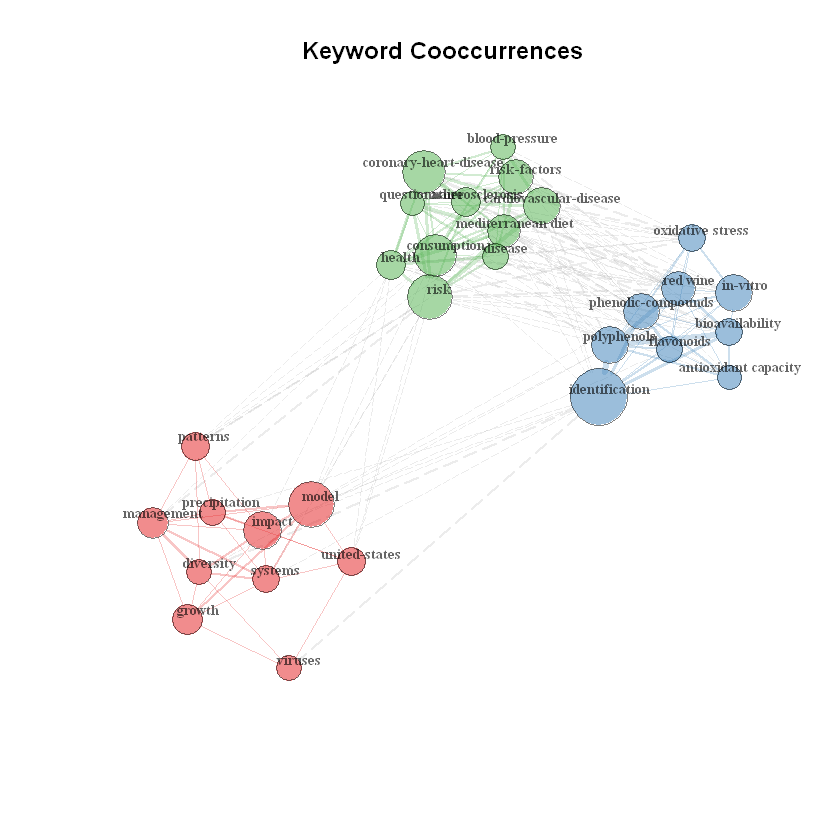

In [34]:
# Create keyword co-occurrences network
NetMatrix <- biblioNetwork(M, analysis = "co-occurrences", network = "keywords", sep = ";")
# Plot the network
net=networkPlot(NetMatrix, normalize="association", weighted=T, n = 30, Title = "Keyword Cooccurrences",
type = "fruchterman", size=T,edgesize = 5,labelsize=0.7)
graf = net$graph
V(graf)
data_json <- d3_igraph(graf)
data_json
write(data_json, 'keywords.json')
# CO-WORD ANALYSIS: THE CONCEPTUAL STRUCTURE OF A FIELD

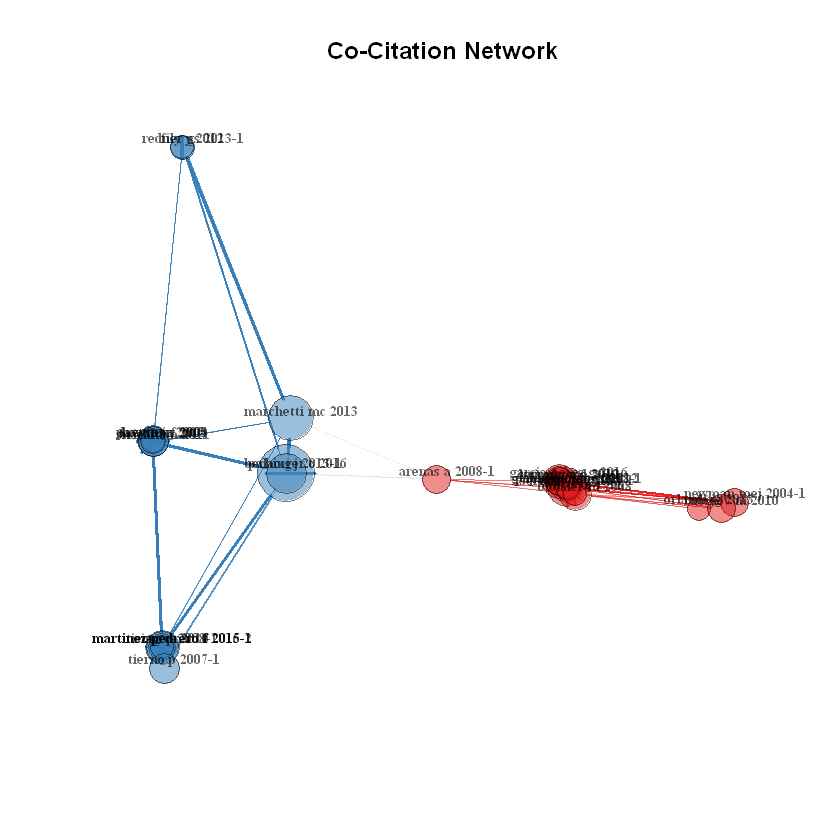

In [10]:
# Create a co-citation network
NetMatrix <- biblioNetwork(M, analysis = "co-citation", network = "references", sep = ";")
# Plot the network
net=networkPlot(NetMatrix, n = 30, Title = "Co-Citation Network", type = "mds", size=T,
remove.multiple=FALSE, labelsize=0.7,edgesize = 5)